In [74]:
%load_ext autoreload
%autoreload 2
#%autoreload 1
#%aimport jiang_package 


import QUANTAXIS as QA
import pandas as pd
#import modin.pandas as pd
import numpy as np
from pprint import  pprint as print

import sklearn as sk
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import lightgbm as lgb
import jiang_package as jp

import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

def draw_pie(series):
    labels = []
    sizes = []
    for label in series.unique():
        labels.append(str(label))
        sizes.append(series[series==label].count())
    df=pd.DataFrame([labels,sizes]).T
    df=df.sort_values([0])
    df.index=range(len(df))
    print(df.T)
    plt.pie(sizes,labels=labels)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
stockCode=QA.QA_fetch_stock_list()['code'].tolist()
stockCode=stockCode[1:100]
data = QA.QA_fetch_stock_day_adv(stockCode, '2020-06-01', '2020-12-31').to_qfq()

In [39]:
dff=data.data.loc[(slice(None),'000002'),:]
dff

,,open,high,low,close,volume,amount,adj
date,code,,,,,,,
2020-03-02,000002,29.90,31.63,29.90,31.13,1375747.0,4.275882e+09,1.0
2020-03-03,000002,31.51,31.63,30.43,31.10,942831.0,2.913733e+09,1.0
2020-03-04,000002,31.28,32.45,30.74,32.26,1129796.0,3.595379e+09,1.0
2020-03-05,000002,31.78,32.70,31.60,32.30,924170.0,2.966840e+09,1.0
2020-03-06,000002,31.81,31.99,30.99,31.13,679528.0,2.124470e+09,1.0
2020-03-09,000002,30.60,31.13,30.01,30.55,843613.0,2.579914e+09,1.0
2020-03-10,000002,30.60,31.57,30.20,30.80,765993.0,2.358611e+09,1.0
2020-03-11,000002,30.83,31.00,30.36,30.38,563318.0,1.728509e+09,1.0
2020-03-12,000002,30.01,30.63,29.60,29.95,593494.0,1.776383e+09,1.0


In [94]:

@jp.fn_timer
def get_xy(start,end,n_days=1):
    stockCode=QA.QA_fetch_stock_list()['code'].tolist()
    stockCode=stockCode[1:100]
    data = QA.QA_fetch_stock_day_adv(stockCode, start, end).to_qfq()

    #1、生成标签（y）
    #获取当前股票n_days天后的最大涨幅和最小涨幅
    Y = data.add_func(jp.max_min_close_n_days,n_days)

    #2、生成样本（x）
    dataset1=jp.get_all_indicator(data)
    dataset1=jp.drop_columns(dataset1,['a','b'])

    #3、标准化样本数据
    dataset1=dataset1
    dataset2=data.data
    
    #####4、合并样本
    dataset=pd.concat([dataset1,dataset2],axis=1)
    
    #####5、时间序列转监督学习（n天的数据生成一个样本）
    dataset=jp.series_to_supervised_parallel(dataset,10)
    dataset=jp.drop_columns(dataset,['a','b'])
    #dataset.to_excel('output1.xlsx')
    
    #根据单条样本标准化
    col_groups=[['open','close','high','low'],'volume','amount']
    dataset=jp.standardization_axis1_parallel(dataset,col_groups)
    
    #####定义Y值，加入样本中
    Y_names=['n_days_max_radio']
    dataset=pd.concat([dataset,Y[Y_names]],axis=1)

    #####删除空值超过90%的样本
    len_columns=len(dataset.columns)
    len1=len(dataset)
    dataset=dataset.dropna(thresh=len_columns*0.80)  #单个样本的非NA值小于thresh，就丢弃样本
    len2=len(dataset)
    print((len1,len2))
    
    #####生成X,Y
    dataset=dataset.astype('float16')
    Y=dataset[Y_names]
    X=dataset.drop(Y_names,axis=1)
    return X,Y

X_train,Y_train_1=get_xy('2019-01-01','2019-09-30')
X_test,Y_test_1=get_xy('2019-10-01','2019-12-31')

(17884, 16983)
Total time running get_xy: 26.018518447875977 seconds
(5917, 5016)
Total time running get_xy: 8.82413363456726 seconds


In [98]:
dataset=pd.concat([X_test,Y_test_1],axis=1)
dataset.to_excel('output.xlsx')

In [27]:
def split_bin(data,bins=6):
    data=data.copy()
    bins=pd.cut(data.iloc[:,0],bins,retbins=False)
    data.iloc[:,0]=LabelEncoder().fit_transform(bins)
    return data
Y_train_2=split_bin(Y_train_1)
Y_test_2=split_bin(Y_test_1)

Text(0, 0.5, 'values of tip_pct')

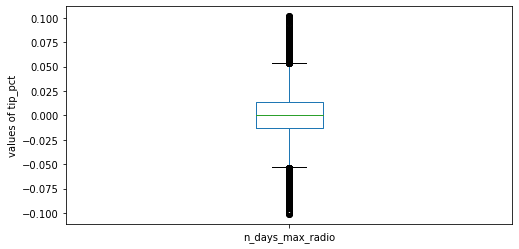

In [3]:
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
fig,axes = plt.subplots()
# dataset.iloc[:,1:6].plot(kind='box',ax=axes)
Y_train_1.plot(kind='box',ax=axes)
axes.set_ylabel('values of tip_pct')

In [23]:
profile = pandas_profiling.ProfileReport(X_test)
profile.to_file("/home/jiang/www/download_web/instance/file/output_file.html")
#Y_train_1.profile_report(title='Titanic Dataset')

In [95]:
Y_train=Y_train_1
Y_test=Y_test_1

params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l1'},
    'num_leaves': 31,
    'learning_rate': 0.001,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.4,
    'bagging_freq': 5,
    'verbose': 0,
    'num_threads':40
}

lgb_train = lgb.Dataset(X_train,Y_train)
lgb_eval = [lgb.Dataset(X_test,Y_test,reference=lgb_train),lgb_train]
model=lgb.train(params,lgb_train,num_boost_round=1000,valid_sets=lgb_eval,early_stopping_rounds=300)
    

[1]	training's l1: 0.0190615	valid_0's l1: 0.0132991
Training until validation scores don't improve for 300 rounds
[2]	training's l1: 0.0190585	valid_0's l1: 0.0132983
[3]	training's l1: 0.019055	valid_0's l1: 0.013297
[4]	training's l1: 0.0190515	valid_0's l1: 0.0132962
[5]	training's l1: 0.0190483	valid_0's l1: 0.0132959
[6]	training's l1: 0.0190452	valid_0's l1: 0.0132959
[7]	training's l1: 0.019042	valid_0's l1: 0.0132958
[8]	training's l1: 0.019039	valid_0's l1: 0.0132961
[9]	training's l1: 0.0190365	valid_0's l1: 0.0132965
[10]	training's l1: 0.0190338	valid_0's l1: 0.0132968
[11]	training's l1: 0.0190311	valid_0's l1: 0.0132968
[12]	training's l1: 0.019029	valid_0's l1: 0.013297
[13]	training's l1: 0.0190262	valid_0's l1: 0.0132973
[14]	training's l1: 0.0190232	valid_0's l1: 0.0132977
[15]	training's l1: 0.0190203	valid_0's l1: 0.0132975
[16]	training's l1: 0.0190175	valid_0's l1: 0.0132972
[17]	training's l1: 0.0190148	valid_0's l1: 0.013298
[18]	training's l1: 0.0190121	valid_

[151]	training's l1: 0.0186646	valid_0's l1: 0.0133222
[152]	training's l1: 0.018662	valid_0's l1: 0.0133228
[153]	training's l1: 0.0186596	valid_0's l1: 0.0133232
[154]	training's l1: 0.0186573	valid_0's l1: 0.0133237
[155]	training's l1: 0.018655	valid_0's l1: 0.0133243
[156]	training's l1: 0.0186529	valid_0's l1: 0.0133255
[157]	training's l1: 0.0186503	valid_0's l1: 0.0133261
[158]	training's l1: 0.0186486	valid_0's l1: 0.0133259
[159]	training's l1: 0.0186467	valid_0's l1: 0.0133261
[160]	training's l1: 0.0186448	valid_0's l1: 0.0133263
[161]	training's l1: 0.0186422	valid_0's l1: 0.0133267
[162]	training's l1: 0.0186397	valid_0's l1: 0.0133278
[163]	training's l1: 0.0186372	valid_0's l1: 0.0133281
[164]	training's l1: 0.0186345	valid_0's l1: 0.0133288
[165]	training's l1: 0.0186317	valid_0's l1: 0.0133296
[166]	training's l1: 0.0186292	valid_0's l1: 0.0133299
[167]	training's l1: 0.0186267	valid_0's l1: 0.0133305
[168]	training's l1: 0.0186236	valid_0's l1: 0.0133309
[169]	traini

[300]	training's l1: 0.0183374	valid_0's l1: 0.0133989
[301]	training's l1: 0.0183353	valid_0's l1: 0.0133997
[302]	training's l1: 0.0183329	valid_0's l1: 0.013401
[303]	training's l1: 0.0183306	valid_0's l1: 0.0134017
[304]	training's l1: 0.0183284	valid_0's l1: 0.0134026
[305]	training's l1: 0.018326	valid_0's l1: 0.0134033
[306]	training's l1: 0.0183243	valid_0's l1: 0.0134032
[307]	training's l1: 0.0183223	valid_0's l1: 0.0134044
[308]	training's l1: 0.0183208	valid_0's l1: 0.0134043
[309]	training's l1: 0.0183185	valid_0's l1: 0.0134049
[310]	training's l1: 0.0183169	valid_0's l1: 0.0134046
[311]	training's l1: 0.0183151	valid_0's l1: 0.0134048
[312]	training's l1: 0.0183129	valid_0's l1: 0.0134071
[313]	training's l1: 0.0183108	valid_0's l1: 0.0134077
[314]	training's l1: 0.0183089	valid_0's l1: 0.0134083
[315]	training's l1: 0.0183071	valid_0's l1: 0.0134081
[316]	training's l1: 0.018305	valid_0's l1: 0.0134088
[317]	training's l1: 0.0183028	valid_0's l1: 0.0134094
[318]	trainin

In [28]:
Y_train=Y_train_2
Y_test=Y_test_2

params = {
    'boosting_type': 'gbdt',
    'objective': 'multiclass',
    'metric': ['multi_logloss'],
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.6,
    'bagging_fraction': 0.4,
    'bagging_freq': 5,
    'verbose': 0,
    'num_class':6,
    'num_threads':40,
    'is_unbalance':True
}

lgb_train = lgb.Dataset(X_train,Y_train)
lgb_eval = [lgb.Dataset(X_test,Y_test,reference=lgb_train),lgb_train]
model=lgb.train(params,lgb_train,num_boost_round=1000,valid_sets=lgb_eval,early_stopping_rounds=300)
    

[1]	training's multi_logloss: 1.21204	valid_0's multi_logloss: 1.02687
Training until validation scores don't improve for 300 rounds
[2]	training's multi_logloss: 1.21018	valid_0's multi_logloss: 1.02675
[3]	training's multi_logloss: 1.20835	valid_0's multi_logloss: 1.02659
[4]	training's multi_logloss: 1.20659	valid_0's multi_logloss: 1.02653
[5]	training's multi_logloss: 1.2049	valid_0's multi_logloss: 1.02644
[6]	training's multi_logloss: 1.20324	valid_0's multi_logloss: 1.02626
[7]	training's multi_logloss: 1.20165	valid_0's multi_logloss: 1.02605
[8]	training's multi_logloss: 1.20004	valid_0's multi_logloss: 1.02589
[9]	training's multi_logloss: 1.19846	valid_0's multi_logloss: 1.02576
[10]	training's multi_logloss: 1.19697	valid_0's multi_logloss: 1.02561
[11]	training's multi_logloss: 1.19537	valid_0's multi_logloss: 1.02545
[12]	training's multi_logloss: 1.1937	valid_0's multi_logloss: 1.02521
[13]	training's multi_logloss: 1.19219	valid_0's multi_logloss: 1.02503
[14]	training

[226]	training's multi_logloss: 1.01014	valid_0's multi_logloss: 1.02423
[227]	training's multi_logloss: 1.00955	valid_0's multi_logloss: 1.0243
[228]	training's multi_logloss: 1.009	valid_0's multi_logloss: 1.02428
[229]	training's multi_logloss: 1.0084	valid_0's multi_logloss: 1.02431
[230]	training's multi_logloss: 1.00779	valid_0's multi_logloss: 1.0243
[231]	training's multi_logloss: 1.00718	valid_0's multi_logloss: 1.02427
[232]	training's multi_logloss: 1.00661	valid_0's multi_logloss: 1.02432
[233]	training's multi_logloss: 1.00598	valid_0's multi_logloss: 1.02431
[234]	training's multi_logloss: 1.00541	valid_0's multi_logloss: 1.02436
[235]	training's multi_logloss: 1.00485	valid_0's multi_logloss: 1.02441
[236]	training's multi_logloss: 1.0043	valid_0's multi_logloss: 1.02445
[237]	training's multi_logloss: 1.0037	valid_0's multi_logloss: 1.02452
[238]	training's multi_logloss: 1.00311	valid_0's multi_logloss: 1.02456
[239]	training's multi_logloss: 1.00252	valid_0's multi_lo

In [29]:
model.feature_importance()

array([193, 197, 188, 173, 195, 213, 349, 437, 365, 139, 176, 230, 170,
       238, 184, 216, 152, 245, 204, 183, 144, 220, 153, 161, 135, 168,
       135, 272, 267, 133, 114, 118, 104, 102,  92, 150, 122, 273, 233,
        54, 108, 118,  82, 118, 106, 116,  88, 213, 170,  25, 106, 113,
        83, 121, 111, 126,  86, 187, 171,  19, 116, 120, 101,  92,  98,
       108,  93, 304, 212,  32, 101, 105, 100,  96,  88, 129, 137, 212,
       194,  32, 102, 124, 119, 130, 102, 189, 119, 268, 197,  34, 110,
       122, 110, 115, 120, 131, 108, 273, 171,  30, 113, 140, 109, 113,
       154, 148, 142, 241, 190,  22], dtype=int32)

0.49183303085299457
    0    1     2     3    4   5
0   0    1     2     3    4   5
1  12  100  1602  1445  102  45


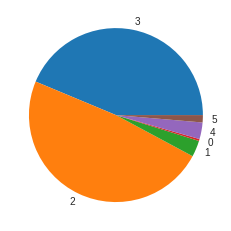

In [80]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_auc_score
    
y_true=Y_test.values.flatten()
y_pred=model.predict(X_test)
y_pred=np.argmax(y_pred,axis=1)

print(accuracy_score(y_true, y_pred))
data=pd.DataFrame([y_true, y_pred]).T
#plt.hist(y_pred,bins=6,stacked=True,histtype='step')

draw_pie(data[0])

/ex_disk/Media/jiang/py/QUANT/jiang_package/__init__.py:73: RuntimeWarning: Mean of empty slice.
  ar=ar/ar.mean()    #去均值的中心化（均值变为0）
/home/jiang/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


,,open,high,low,close,volume,amount,adj
date,code,,,,,,,
2020-03-02,000002,29.90,31.63,29.90,31.13,1375747.0,4.275882e+09,1.0
2020-03-03,000002,31.51,31.63,30.43,31.10,942831.0,2.913733e+09,1.0
2020-03-04,000002,31.28,32.45,30.74,32.26,1129796.0,3.595379e+09,1.0
2020-03-05,000002,31.78,32.70,31.60,32.30,924170.0,2.966840e+09,1.0
2020-03-06,000002,31.81,31.99,30.99,31.13,679528.0,2.124470e+09,1.0
2020-03-09,000002,30.60,31.13,30.01,30.55,843613.0,2.579914e+09,1.0
2020-03-10,000002,30.60,31.57,30.20,30.80,765993.0,2.358611e+09,1.0
2020-03-11,000002,30.83,31.00,30.36,30.38,563318.0,1.728509e+09,1.0
2020-03-12,000002,30.01,30.63,29.60,29.95,593494.0,1.776383e+09,1.0


      0    1
0     2    3
1  2702  604


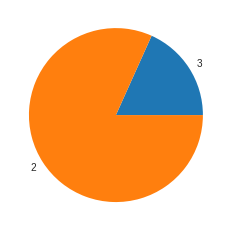

In [82]:
draw_pie(data[1])

In [79]:
y_pred_pa = model.predict(X_test)  # !!!注意lgm预测的是分数，类似 sklearn的predict_proba
y_test_oh = label_binarize(Y_test, classes= range(6))
roc_auc_score(y_test_oh, y_pred_pa, average='micro')

0.8760222389839881

Text(0, 0.5, 'values of tip_pct')

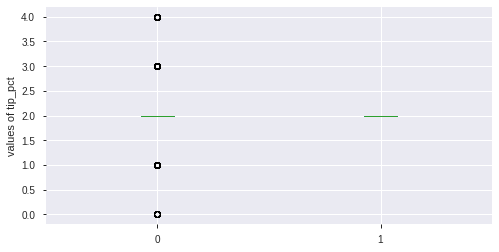

In [26]:
plt.rcParams['figure.figsize'] = (8.0, 4.0) # 设置figure_size尺寸
fig,axes = plt.subplots()
# dataset.iloc[:,1:6].plot(kind='box',ax=axes)
data.plot(kind='box',ax=axes)
axes.set_ylabel('values of tip_pct')

,,open_4,high_4,low_4,close_4,volume_4,amount_4,adj_4,open_3,high_3,low_3,...,volume_1,amount_1,adj_1,open_0,high_0,low_0,close_0,volume_0,amount_0,adj_0
date,code,,,,,,,,,,,,,,,,,,,,,
2020-03-02,000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-03-03,000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-03-04,000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-03-05,000002,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
2020-03-06,000002,0.951835,1.006908,0.951835,0.990991,1.361567,1.346624,1.0,1.003088,1.006908,0.968707,...,0.914645,0.934361,1.0,1.012638,1.018368,0.986534,0.990991,0.672524,0.669069,1.0
2020-03-09,000002,1.003519,1.007341,0.969124,0.990462,1.042969,1.027385,1.0,0.996194,1.033456,0.978996,...,0.751701,0.749090,1.0,0.974538,0.991417,0.955748,0.972945,0.933213,0.909680,1.0
2020-03-10,000002,0.998579,1.035930,0.981340,1.029865,1.300679,1.319384,1.0,1.014541,1.043911,1.008795,...,0.971211,0.946743,1.0,0.976871,1.007837,0.964102,0.983256,0.881851,0.865532,1.0
2020-03-11,000002,1.021323,1.050889,1.015538,1.038034,1.223541,1.261589,1.0,1.022287,1.028072,0.995935,...,1.014125,1.002952,1.0,0.990793,0.996256,0.975688,0.976331,0.745796,0.735014,1.0
2020-03-12,000002,1.035920,1.041782,1.009216,1.013775,0.985982,1.005154,1.0,0.996515,1.013775,0.977302,...,0.817363,0.817812,1.0,0.977302,0.997492,0.963950,0.975348,0.861148,0.840463,1.0


In [23]:
data.data

open       high        low      close        volume  \
date       code                                                               
2020-03-02 000002  29.900000  31.630000  29.900000  31.130000  1.375747e+06   
           000004  43.000000  44.770000  42.630000  44.770000  7.080500e+04   
           000005   2.800000   2.920000   2.800000   2.880000  1.025810e+05   
           000006   4.493689   4.716918   4.493689   4.678095  1.581769e+05   
           000007   8.630000   8.910000   8.580000   8.800000  1.808850e+05   
           000008   3.129428   3.288889   3.129428   3.278923  4.419129e+05   
           000009   7.400000   7.750000   7.370000   7.710000  1.089139e+06   
           000010   3.460000   3.590000   3.450000   3.570000  3.294000e+04   
           000011   7.310590   7.579574   7.310590   7.541148  3.152430e+04   
           000012   5.078187   5.383865   5.068327   5.314841  7.546977e+05   
           000014   8.100479   8.450068   8.100479   8.420104  2.351060e+04   
           000016   9.777643  10.483143   9.539163  10.026058  3.208081e+06   
           000017   3.710000   3.830000   3.690000   3.830000  3.993900e+04   
           000019   5.913269   6.362131   5.903511   6.274310  1.803375e+05   
           000020   9.650000  10.150000   9.650000   9.990000  1.819500e+04   
           000021  17.962016  19.098979  17.513215  18.809751  1.117590e+06   
           000023  11.444077  12.533513  11.444077  12.533513  6.530278e+04   
           000025  19.104941  20.102588  19.015153  19.803294  8.424623e+04   
           000026   8.857088   9.218802   8.798432   9.140594  9.384172e+04   
           000027   4.483864   4.640758   4.483864   4.615985  1.454797e+05   
           000028  43.155904  43.945943  43.116402  43.669429  3.107288e+04   
           000030   5.973693   6.226239   5.857133   6.226239  2.034031e+05   
           000031   5.446415   5.708542   5.446415   5.669708  1.993057e+05   
           000032  18.281286  18.888671  17.823258  18.609871  8.989942e+04   
           000034  26.306635  28.159494  26.257093  28.040594  3.034112e+05   
           000035   5.160000   5.350000   5.150000   5.300000  1.742140e+05   
           000036   3.267168   3.396378   3.267168   3.368690  1.076595e+05   
           000037  10.072663  10.501924  10.052698  10.312251  1.765233e+04   
           000038   9.400000   9.650000   9.370000   9.590000  6.178300e+04   
           000039   7.860782   8.136253   7.860782   8.087062  1.087559e+05   
...                      ...        ...        ...        ...           ...   
2020-08-03 000338  16.460000  17.180000  16.460000  16.990000  7.033800e+05   
           000400  16.200000  16.380000  15.920000  16.290000  3.350830e+05   
           000401  19.180000  19.690000  19.080000  19.280000  4.051800e+05   
           000402   6.930000   6.970000   6.920000   6.970000  8.085600e+04   
           000403  45.990000  46.580000  43.610000  45.740000  9.464000e+04   
           000404   4.170000   4.240000   4.100000   4.160000  2.622200e+05   
           000407   4.140000   4.190000   4.110000   4.180000  1.261190e+05   
           000408   8.230000   8.550000   8.220000   8.250000  9.462800e+04   
           000409   4.200000   4.280000   4.200000   4.260000  4.872900e+04   
           000410   4.530000   4.610000   4.530000   4.580000  5.787200e+04   
           000411  24.800000  24.940000  24.020000  24.940000  1.649650e+05   
           000413   2.800000   2.870000   2.790000   2.860000  1.090979e+06   
           000415   3.080000   3.150000   3.070000   3.100000  3.792310e+05   
           000416   5.150000   5.430000   5.140000   5.310000  1.641480e+05   
           000417   6.690000   7.040000   6.570000   6.950000  2.462910e+05   
           000419   5.130000   5.220000   5.100000   5.200000  6.531200e+04   
           000420   2.110000   2.140000   2.100000   2.130000  2.585440e+05   
           000421   8.800000   9.320000   8.230000   9.320000  1.095417e+0

In [81]:
f

,,open_3,low_3,open_2,low_2,open_1,low_1,open_0,low_0
date,code,,,,,,,,
2020-07-01,000002,NaN,NaN,NaN,NaN,NaN,NaN,26.18,26.17
2020-07-02,000002,NaN,NaN,NaN,NaN,26.18,26.17,28.00,27.77
2020-07-03,000002,NaN,NaN,26.18,26.17,28.00,27.77,28.65,28.14
2020-07-06,000002,26.18,26.17,28.00,27.77,28.65,28.14,29.30,29.30
2020-07-07,000002,28.00,27.77,28.65,28.14,29.30,29.30,31.50,30.00
2020-07-08,000002,28.65,28.14,29.30,29.30,31.50,30.00,30.30,29.65
2020-07-09,000002,29.30,29.30,31.50,30.00,30.30,29.65,30.45,29.88
2020-07-10,000002,31.50,30.00,30.30,29.65,30.45,29.88,30.02,28.99
2020-07-13,000002,30.30,29.65,30.45,29.88,30.02,28.99,28.92,28.48
